In [1]:
from IPython.display import Image # resim import etmek için kullanırız.    Image(filename = "") ile ise resmi import ederiz.
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sbn 
import tensorflow as tf

In [2]:
# tahmin istatistikten gelir oradan gelen metotlara göre işlem yaparız.
# kategorik veriler üzerinde bir tahmin yapılırsa buna sınıflandırma denir sayısal verilerde yapılırsa buna tahmin denir.
# genel olarak tahminler sayısal verilerle yapılır.
# tahmin prediction demektir.  öngörü ise forecasting'dir.   öngörü demek daha hiç ulaşılmayan yere bir tahminde bulunmak.   mesela tüm zamanların borsa verileri ile bir ay sonrayı tahmin etmek.  ama prediction ise geçmiş verilerin vs tahminini yapmak içindir veya elde olan somut olarak olan verilerle tahmin etmektir.


In [3]:
df = pd.read_csv("bilkav.com_satislar.csv")
df

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5
5,19,28321.0
6,19,30075.0
7,20,27222.5
8,20,32222.5
9,24,28594.5


## BASİT DOĞRUSAL REGRESYON(SIMPLE LINEAR REGRESSION)

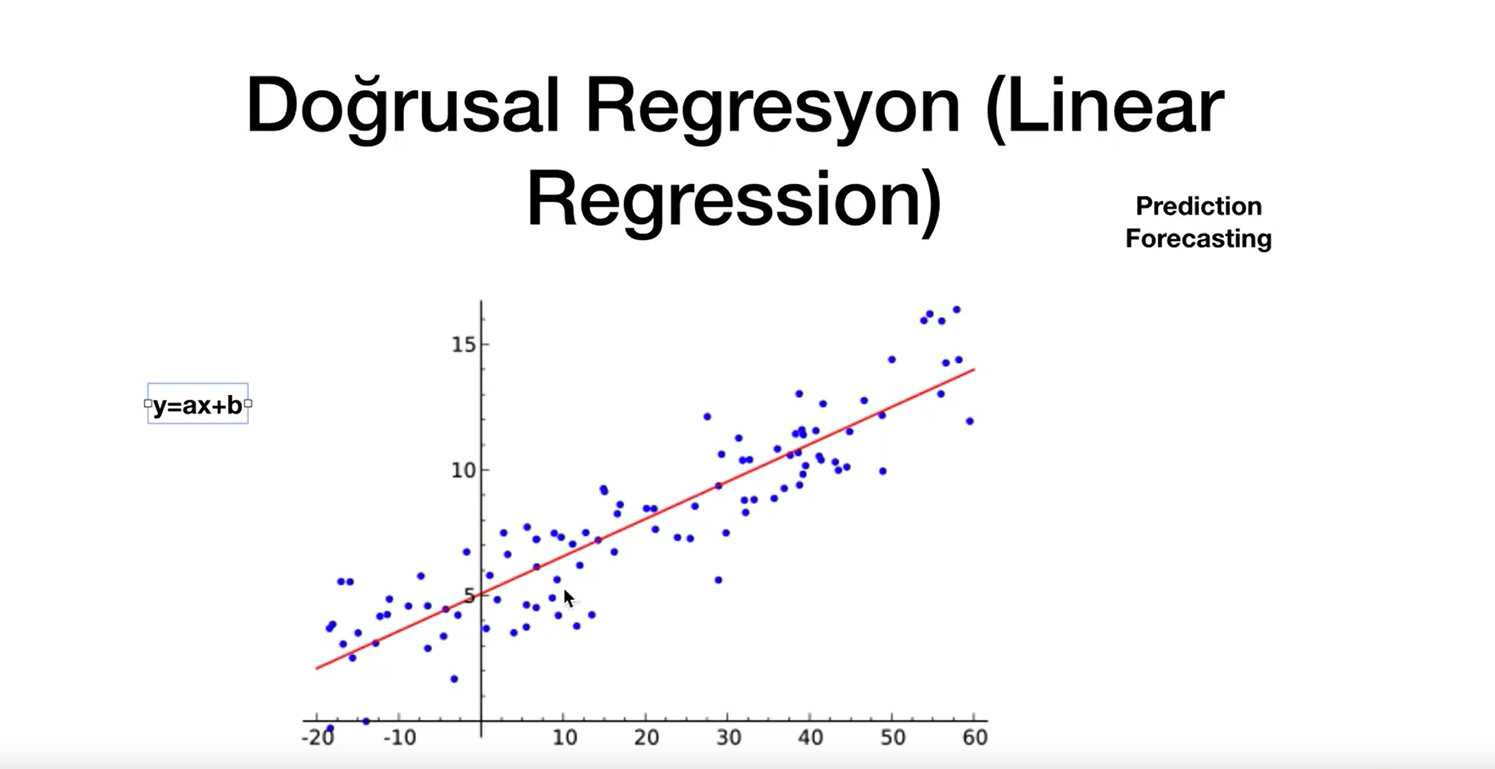

In [4]:
# y = ax + b     x burada bağımsız değişken y ise bağımlı değişkendir.    x'e göre y değer alır biz modele x ve y deperlerini veririz öğrenir sonra ise yeni x değerleri veririz ve y değerini tahmin eder.
        # b değeri ise ne kadar kaydırma olacağını belli eder sağa veya sola olacak şekilde.
# yani elde olan verilere göre bir ax + b kurarız ve yeni gelen  
Image(filename="FOTO1.png") 

# neticede amacımız hata miktarlarını minimize etmek. 
        

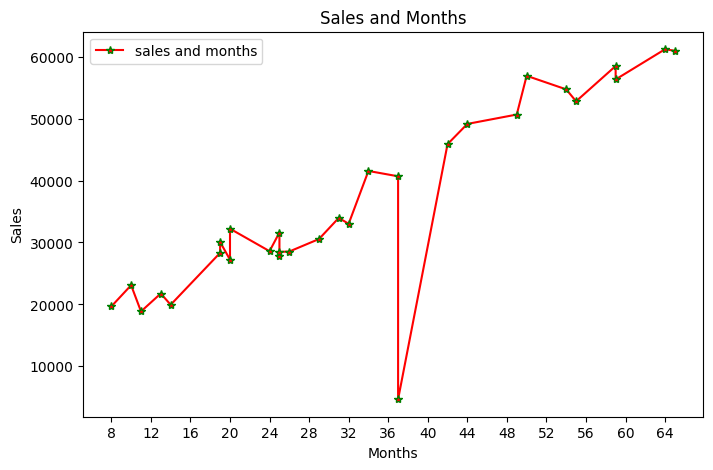

In [5]:
plt.figure(figsize=(8,5))
plt.title("Sales and Months")
plt.plot(df["Aylar"],df["Satislar"],marker = "*",color = "r",markeredgecolor = "g",label = "sales and months")
plt.xticks(np.arange(df["Aylar"].iloc[0],df["Aylar"].iloc[-1])[::4])
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend(loc = 2)
plt.show()

### VERİ YÜKLEME VE ÖN İŞLEME VERİLERİN REGRESYON İÇİN AYARLANMASI

In [6]:
df11 = pd.read_csv("bilkav.com_satislar.csv") # okunacak dosya ve okuyucunun path'ini ayarlamak gerekir.
df11.head()

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5


In [13]:
aylar = df[["Aylar"]]
satislar = df[["Satislar"]]
print(aylar.values)
print(satislar.values)

[[ 8]
 [10]
 [11]
 [13]
 [14]
 [19]
 [19]
 [20]
 [20]
 [24]
 [25]
 [25]
 [25]
 [26]
 [29]
 [31]
 [32]
 [34]
 [37]
 [37]
 [42]
 [44]
 [49]
 [50]
 [54]
 [55]
 [59]
 [59]
 [64]
 [65]]
[[19671.5]
 [23102.5]
 [18865.5]
 [21762.5]
 [19945.5]
 [28321. ]
 [30075. ]
 [27222.5]
 [32222.5]
 [28594.5]
 [31609. ]
 [27897. ]
 [28478.5]
 [28540.5]
 [30555.5]
 [33969. ]
 [33014.5]
 [41544. ]
 [40681.5]
 [ 4697. ]
 [45869. ]
 [49136.5]
 [50651. ]
 [56906. ]
 [54715.5]
 [52791. ]
 [58484.5]
 [56317.5]
 [61195.5]
 [60936. ]]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [18]:
x_train,x_test,y_train,y_test = train_test_split(aylar,satislar,test_size=0.33,random_state=0)
sc = StandardScaler()  # bunu kullanmamızın nedeni verileri aynı yapıya indirgemek içindir. model için kullanacak hale getirilir aslında.

x_train2 = sc.fit_transform(x_train)
x_test2 = sc.fit_transform(x_test)

y_train2 = sc.fit_transform(y_train)
y_test2 = sc.fit_transform(y_test)



##### BASİT DOGRUSAL REGRESYON MODELİ

In [21]:
# model inşası.
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # bir nesne oluşturduk constructor ile. class ile nesne oluştu.
lr.fit(x_train2,y_train2) # fit fonksiyonu modeli inşa etmeye yarar.   x_train verileri ile y_train'i kullanarak kendisini eğitecek.   ve sonra test kullanacağız sonra modelin nasıl bir yapıya olduğunu görebileceğiz.

lr.predict(x_test2,y_test2) # predict tahmin demektir. 



LinearRegression()